# Lab 6.02 - Regression analysis

In [1]:
# Package imports
import numpy as np                                  # "Scientific computing"
import scipy.stats as stats                         # Statistical tests

import pandas as pd                                 # Dataframe
import matplotlib.pyplot as plt                     # Basic visualisation
from statsmodels.graphics.mosaicplot import mosaic  # Mosaic plot
import seaborn as sns                               # Advanced dataviz
from sklearn.linear_model import LinearRegression

## Exercise 2: Flemish agricultural and horticultural businesses

1. Use the dataset agriculture flanders.csv. The file contains data about agricultural and horticultural businesses in Flanders

    Source: Departement Landbouw en Visserij op basis van StatBel

In [23]:
df = pd.read_csv('https://raw.githubusercontent.com/HoGentTIN/dsai-labs/main/data/agriculture%20flanders.csv', delimiter = ";", decimal=',', index_col=0)
# Show the first few records of the Data Frame
df.head()

,number_of_farms,average_area_per_farm_(ha)
year,,
1980,75706,8.38
1981,73292,8.58
1982,71255,8.79
1983,69807,8.94
1984,68083,9.15


2. What are the datatypes for each of the columns.

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 3 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   year                        41 non-null     int64  
 1   number_of_farms             41 non-null     int64  
 2   average_area_per_farm_(ha)  41 non-null     float64
dtypes: float64(1), int64(2)
memory usage: 1.1 KB


3. Draw a scatter plot of the number of farms versus the year.


<Axes: xlabel='year', ylabel='number_of_farms'>

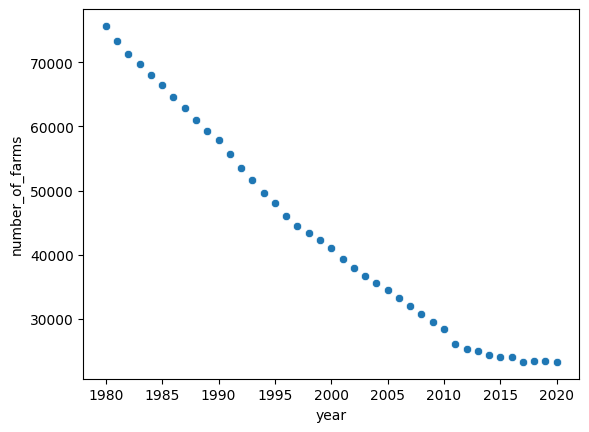

In [25]:
sns.scatterplot(x=df.index, y=df['number_of_farms'])

4. Is there a positive / negative relationship between year and number_of_farms?

    $R = -0.9861066349492859$

In [28]:
r, p = stats.pearsonr(df.index, y=df['number_of_farms'])
print(f"Correlation coefficient (r): {r:.4f}")

Correlation coefficient (r): -0.9861


6. Is there a strong relationship between year and 'number_of_farms'?

    $R^2 = 0.9724062954910041$

In [29]:
r_squared = r ** 2
print(f"Coefficient of determination (R²): {r_squared:.4f}")

Coefficient of determination (R²): 0.9724


7. Draw a scatter plot of the 'average_area_per_farm_(ha)' versus the year.

<Axes: xlabel='year', ylabel='average_area_per_farm_(ha)'>

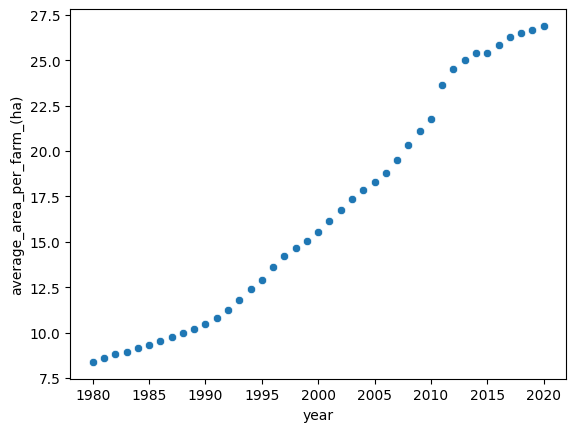

In [30]:
sns.scatterplot(x=df.index, y=df['average_area_per_farm_(ha)'])

8. What will be the 'average_area_per_farm_(ha)' in 2035?

Average area in 2035 = 34.91987804878045

In [34]:
slope, intercept, r_value, p_value, std_err = stats.linregress(df.index, df['average_area_per_farm_(ha)'])

year = 2035
predicted_area = intercept + slope * year

print(f"Predicted average area per farm in {year}: {predicted_area} ha")

Predicted average area per farm in 2035: 34.91987804878045 ha


8. Calculate the total agricultural area for each year.   
Calculate for each year the change of the total area relative to 1980.  
Make a plot.

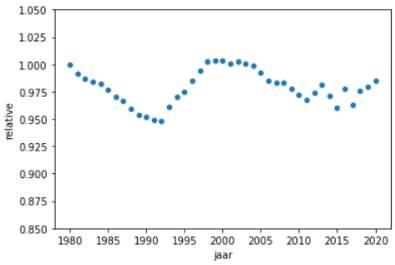


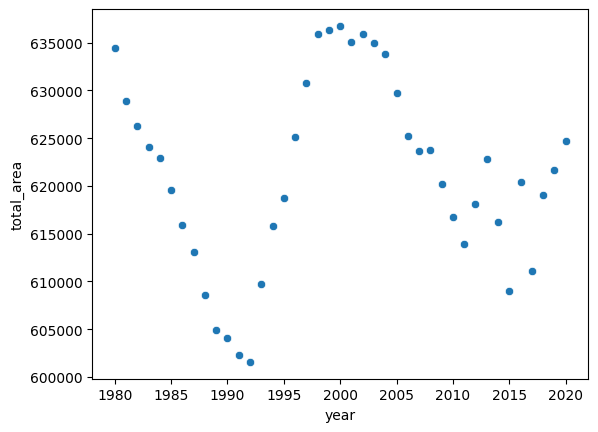

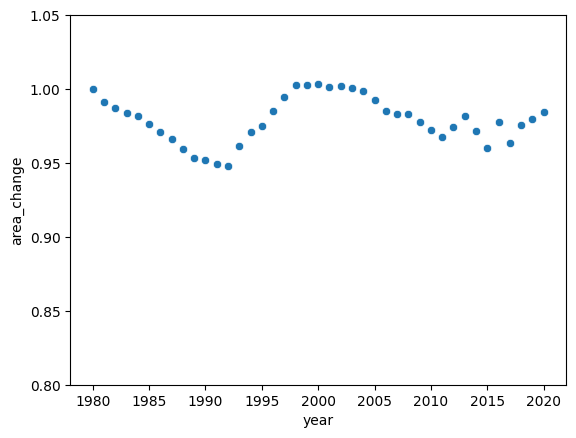

In [ ]:
df['total_area'] = df['average_area_per_farm_(ha)'] * df['number_of_farms']
# sns.scatterplot(data=df['total_area']);plt.ylim(bottom=.8, top=1.05);plt.show()
area_1980 = df.loc[df.index == 1980]['total_area'].values[0]
df['area_change'] = df['total_area'] / area_1980
df['area_change']
sns.scatterplot(data=df['area_change']);plt.ylim(bottom=.8, top=1.05);plt.show()